<a href="https://colab.research.google.com/github/Dheeraj024/neural-network-bagging-/blob/main/hyperspectral_final2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
hyp_data = sio.loadmat("Indian_pines_corrected.mat")
gt_data = sio.loadmat("Indian_pines_gt.mat")

In [3]:
data = hyp_data[sorted(hyp_data.keys())[-1]]

In [4]:
def applyPCA(X, n_components=30, seed=1):
    newX = np.reshape(X, (-1, X.shape[2]))
    pca = PCA(n_components=n_components, whiten=True, random_state=seed)
    newX = pca.fit_transform(newX)
    newX = np.reshape(newX, (X.shape[0], X.shape[1], n_components))
    return newX


# def applyPCA(X, n_components=30, seed=1):
#     # Reshape input data to 2D array
#     X_reshape = X.reshape(-1, X.shape[2])
    
#     # Center the data
#     X_mean = np.mean(X_reshape, axis=0)
#     X_centered = X_reshape - X_mean
    
#     # Compute covariance matrix and eigenvalues/eigenvectors
#     cov = np.cov(X_centered.T)
#     eigvals, eigvecs = np.linalg.eigh(cov)
    
#     # Sort eigenvalues in decreasing order and select top n_components eigenvectors
#     eigvals_sorted = np.flip(eigvals.argsort())
#     eigvecs_sorted = eigvecs[:, eigvals_sorted[:n_components]]
    
#     # Project data onto eigenvectors
#     newX = np.dot(X_centered, eigvecs_sorted)
    
#     # Reshape projected data back to original shape
#     newX = newX.reshape(X.shape[0], X.shape[1], n_components)
    
#     return newX




In [5]:
data = applyPCA(data)
data.shape

(145, 145, 30)

In [6]:
labels = gt_data[sorted(gt_data.keys())[-1]]

In [7]:
print(data.shape)
print(labels.shape)

(145, 145, 30)
(145, 145)


In [8]:
data = data.reshape(data.shape[0]*data.shape[1],data.shape[2])
data.shape

(21025, 30)

In [9]:
labels = labels.reshape(-1,1)
labels.shape

(21025, 1)

In [10]:
combine = np.concatenate((data,labels),axis=1)
combine

array([[ 0.96876849,  0.4801512 ,  0.09501285, ..., -0.08308338,
        -0.3144414 ,  3.        ],
       [ 1.08206297, -0.66688618,  0.45761543, ..., -1.70082187,
         3.01117831,  3.        ],
       [ 1.11968468, -1.01852852,  0.64112087, ...,  0.83300539,
        -0.37002131,  3.        ],
       ...,
       [-1.42368833, -0.37320899,  0.52039646, ...,  0.37675531,
         1.08857678,  0.        ],
       [-1.255093  ,  0.26308297,  0.88456889, ...,  0.01608009,
        -0.01004176,  0.        ],
       [-1.26926721,  0.11428131,  0.60833014, ...,  0.53927323,
         0.54789815,  0.        ]])

In [11]:
combine = np.delete(combine,np.where(combine[:,-1]==0),axis=0)

In [12]:
combine

array([[ 0.96876849,  0.4801512 ,  0.09501285, ..., -0.08308338,
        -0.3144414 ,  3.        ],
       [ 1.08206297, -0.66688618,  0.45761543, ..., -1.70082187,
         3.01117831,  3.        ],
       [ 1.11968468, -1.01852852,  0.64112087, ...,  0.83300539,
        -0.37002131,  3.        ],
       ...,
       [ 0.78190925, -0.06725478, -0.82645118, ...,  0.47676664,
         0.10542668, 10.        ],
       [ 0.84842986, -0.14102249, -0.78848811, ...,  0.56100352,
         0.1365349 , 10.        ],
       [ 0.90907877, -0.15120964, -0.76338284, ...,  0.55151822,
         0.14988625, 10.        ]])

In [13]:
hyp_columns = []
for i in range(data.shape[1]):
  hyp_columns.append('b'+str(i))

hyp_columns.append('labels')

In [14]:
combine.shape

(10249, 31)

In [15]:
df = pd.DataFrame(combine,columns = hyp_columns)
df.head()

,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,b21,b22,b23,b24,b25,b26,b27,b28,b29,labels
0,0.968768,0.480151,0.095013,0.125597,-0.835529,-0.153065,0.340914,-0.808389,0.739768,-0.196726,...,-0.680243,-0.742375,0.309232,0.706960,-0.505994,0.346319,-0.390967,-0.083083,-0.314441,3.0
1,1.082063,-0.666886,0.457615,-0.932147,0.283993,-0.641161,0.513249,0.639667,-1.369898,0.276044,...,-0.074711,0.634126,0.264466,-0.794392,-0.303542,1.126113,-0.518024,-1.700822,3.011178,3.0
2,1.119685,-1.018529,0.641121,-1.340924,0.498481,-0.292635,0.437308,0.546881,1.651552,-0.565767,...,0.060651,0.936132,0.691308,-1.013655,-0.927224,0.821306,0.184328,0.833005,-0.370021,3.0
3,1.079131,-0.780896,0.465640,-0.886678,0.281052,-0.681895,0.634920,0.624044,-0.905912,0.162279,...,0.120929,0.673786,0.522048,-0.722938,-0.164347,1.201609,-0.673626,-1.598063,2.643712,3.0
4,0.969944,0.111926,-0.030070,-0.163259,-0.706674,-0.974477,1.271296,-0.917720,-0.543372,-0.199309,...,-0.232870,-0.182736,0.318033,0.060125,-0.217072,0.644748,-0.392546,0.256941,0.084382,3.0


In [16]:
class StandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None
    
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
    
    def transform(self, X):
        X_scaled = (X - self.mean) / self.std
        return X_scaled
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [17]:
scaler = StandardScaler()
scaler.fit(data)
scaler.transform(data)
data= scaler.fit_transform(data)

In [18]:
df = pd.DataFrame(combine,columns = hyp_columns)
df.head()

,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,b21,b22,b23,b24,b25,b26,b27,b28,b29,labels
0,0.968768,0.480151,0.095013,0.125597,-0.835529,-0.153065,0.340914,-0.808389,0.739768,-0.196726,...,-0.680243,-0.742375,0.309232,0.706960,-0.505994,0.346319,-0.390967,-0.083083,-0.314441,3.0
1,1.082063,-0.666886,0.457615,-0.932147,0.283993,-0.641161,0.513249,0.639667,-1.369898,0.276044,...,-0.074711,0.634126,0.264466,-0.794392,-0.303542,1.126113,-0.518024,-1.700822,3.011178,3.0
2,1.119685,-1.018529,0.641121,-1.340924,0.498481,-0.292635,0.437308,0.546881,1.651552,-0.565767,...,0.060651,0.936132,0.691308,-1.013655,-0.927224,0.821306,0.184328,0.833005,-0.370021,3.0
3,1.079131,-0.780896,0.465640,-0.886678,0.281052,-0.681895,0.634920,0.624044,-0.905912,0.162279,...,0.120929,0.673786,0.522048,-0.722938,-0.164347,1.201609,-0.673626,-1.598063,2.643712,3.0
4,0.969944,0.111926,-0.030070,-0.163259,-0.706674,-0.974477,1.271296,-0.917720,-0.543372,-0.199309,...,-0.232870,-0.182736,0.318033,0.060125,-0.217072,0.644748,-0.392546,0.256941,0.084382,3.0


In [19]:
 hyp_columns = hyp_columns[-1:] + hyp_columns[:-1]
 df = df[hyp_columns]
 df.head()

,labels,b0,b1,b2,b3,b4,b5,b6,b7,b8,...,b20,b21,b22,b23,b24,b25,b26,b27,b28,b29
0,3.0,0.968768,0.480151,0.095013,0.125597,-0.835529,-0.153065,0.340914,-0.808389,0.739768,...,0.216976,-0.680243,-0.742375,0.309232,0.706960,-0.505994,0.346319,-0.390967,-0.083083,-0.314441
1,3.0,1.082063,-0.666886,0.457615,-0.932147,0.283993,-0.641161,0.513249,0.639667,-1.369898,...,0.196222,-0.074711,0.634126,0.264466,-0.794392,-0.303542,1.126113,-0.518024,-1.700822,3.011178
2,3.0,1.119685,-1.018529,0.641121,-1.340924,0.498481,-0.292635,0.437308,0.546881,1.651552,...,-0.033171,0.060651,0.936132,0.691308,-1.013655,-0.927224,0.821306,0.184328,0.833005,-0.370021
3,3.0,1.079131,-0.780896,0.465640,-0.886678,0.281052,-0.681895,0.634920,0.624044,-0.905912,...,0.069646,0.120929,0.673786,0.522048,-0.722938,-0.164347,1.201609,-0.673626,-1.598063,2.643712
4,3.0,0.969944,0.111926,-0.030070,-0.163259,-0.706674,-0.974477,1.271296,-0.917720,-0.543372,...,0.211589,-0.232870,-0.182736,0.318033,0.060125,-0.217072,0.644748,-0.392546,0.256941,0.084382


In [20]:
class NeuralNetwork:

    # def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
    #     self.input_size = input_size
    #     self.hidden_size1 = hidden_size1
    #     self.hidden_size2 = hidden_size2
    #     self.output_size = output_size

    #     # Initialize weights and biases
    #     self.W1 = np.random.randn(self.input_size, self.hidden_size1) * 0.01
    #     self.b1 = np.zeros((1, self.hidden_size1))
    #     self.W2 = np.random.randn(self.hidden_size1, self.hidden_size2) * 0.01
    #     self.b2 = np.zeros((1, self.hidden_size2))
    #     self.W3 = np.random.randn(self.hidden_size2, self.output_size) * 0.01
    #     self.b3 = np.zeros((1, self.output_size))

    # def forward(self, X):
    #     # Forward pass
    #     self.z1 = np.dot(X, self.W1) + self.b1
    #     self.a1 = np.maximum(0, self.z1)  # ReLU activation
    #     self.z2 = np.dot(self.a1, self.W2) + self.b2
    #     self.a2 = np.maximum(0, self.z2)  # ReLU activation
    #     self.z3 = np.dot(self.a2, self.W3) + self.b3
    #     self.a3 = np.exp(self.z3 - np.max(self.z3, axis=1, keepdims=True))  # Softmax activation
    #     self.a3 /= np.sum(self.a3, axis=1, keepdims=True)
    #     return self.a3

    # def backward(self, X, y, learning_rate):
    # # Backward pass
    #   m = X.shape[0]

    #   dZ3 = self.a3
    #   dZ3[range(m), y.astype(int)] -= 1
    #   dZ3 /= m

    #   dW3 = np.dot(self.a2.T, dZ3)
    #   db3 = np.sum(dZ3, axis=0)

    #   dA2 = np.dot(dZ3, self.W3.T)
    #   dZ2 = dA2 * (self.a2 > 0)  # ReLU derivative

    #   dW2 = np.dot(self.a1.T, dZ2)
    #   db2 = np.sum(dZ2, axis=0)

    #   dA1 = np.dot(dZ2, self.W2.T)
    #   dZ1 = dA1 * (self.a1 > 0)  # ReLU derivative

    #   dW1 = np.dot(X.T, dZ1)
    #   db1 = np.sum(dZ1, axis=0)

    # # Update weights and biases
    #   self.W3 -= learning_rate * dW3
    #   self.b3 -= learning_rate * db3
    #   self.W2 -= learning_rate * dW2
    #   self.b2 -= learning_rate * db2
    #   self.W1 -= learning_rate * dW1
    #   self.b1 -= learning_rate * db1





    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.01
        self.b2 = np.zeros((1, self.output_size))

    def forward(self, X):
        # Forward pass
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = np.maximum(0, self.z1)  # ReLU activation
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = np.exp(self.z2 - np.max(self.z2, axis=1, keepdims=True))  # Softmax activation
        self.a2 /= np.sum(self.a2, axis=1, keepdims=True)
        return self.a2

    def backward(self, X, y, learning_rate):
        # Backward pass
        m = X.shape[0]

        dZ2 = self.a2
        dZ2[range(m), y.astype(int)] -= 1
        dZ2 /= m

        dW2 = np.dot(self.a1.T, dZ2)
        db2 = np.sum(dZ2, axis=0)

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * (self.a1 > 0)  # ReLU derivative

        dW1 = np.dot(X.T, dZ1)
        db1 = np.sum(dZ1, axis=0)

        # Update weights and biases
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, epochs, learning_rate):
        epsilon = 1e-8
        for epoch in range(epochs):
            # Forward pass
            a2 = self.forward(X)

            # Compute loss
            loss = -np.sum(np.log(a2[range(X.shape[0]), y.astype(int)]+epsilon)) / X.shape[0]

            # Backward pass
            self.backward(X, y, learning_rate)

            # Print loss
            if (epoch+1) % 100 == 0:
              print(f'Epoch {epoch}, Loss: {loss:.4f}')

    def predict(self, X):
        # Predict class labels
        a2 = self.forward(X)
        y_pred = np.argmax(a2, axis=1)
        return y_pred


In [21]:
def sampling(tdata,val):
    len1= int(len(tdata)*val)
    t1 = tdata.sample(frac=1)
    val_data = t1.iloc[0:len1,:]
    train = t1.iloc[len1:,:]
    return val_data,train

In [22]:
# x_train = df.iloc[:,1:]
# y_train = df.iloc[:,0]
# x_test = df.iloc[:,1:]
# y_test = df.iloc[:,0]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df.iloc[:,1:] , df.iloc[:,0] , test_size=0.33, random_state=42)

In [24]:
print(X_train)
X_train.shape

            b0        b1        b2        b3        b4        b5        b6  \
1420  2.050698 -0.896183  5.142563  1.181887  1.497903 -0.019131  0.890384   
5281  0.979565  0.212576  0.150633 -0.217770 -1.051537 -0.321965  0.231697   
8530 -0.971668 -0.756673 -0.410650 -0.169108  1.466101 -0.898316 -0.682398   
6696 -1.684816 -1.397261  0.288518 -0.633818  0.266220  0.781819  0.145849   
5517  1.180253  0.519608  0.013616  0.144078 -1.166098  0.479326 -1.089486   
...        ...       ...       ...       ...       ...       ...       ...   
5734  0.984086  0.483117 -1.338848 -0.107190 -1.241532 -0.639028  1.026829   
5191 -0.773074  0.176618  0.033346  0.262807  0.993996 -1.522434 -0.910672   
5390  1.302356 -1.317963 -0.081455  0.055237 -1.013731  0.728674 -1.969541   
860   0.696948  2.812994 -0.803205  1.112825  0.634107  2.614688  1.467014   
7270  0.846028 -0.888089 -0.157176 -0.541581  1.027685  1.254396 -1.428856   

            b7        b8        b9  ...       b20       b21    

(6866, 30)

In [25]:
nn = NeuralNetwork(X_train.shape[1],128,17)

In [26]:
nn.train(X_test,y_test,30,0.01)

In [27]:
model_net = []
for i in range(5):
    validation,train_data = sampling(df,0.2)
    v_data = validation.iloc[:,1:]
    v_label = validation.iloc[:,0]
    # gen = generator(train_data,8)
    # x,y = gen
    x_data = train_data.iloc[:,1:]
    y_data = train_data.iloc[:,0]
    nn = NeuralNetwork(X_train.shape[1],128,17)
    nn.train(x_data,y_data,500,1)
    model_net.append(nn)

Epoch 99, Loss: 0.8107
Epoch 199, Loss: 0.6131
Epoch 299, Loss: 0.5093
Epoch 399, Loss: 0.4450
Epoch 499, Loss: 0.3986
Epoch 99, Loss: 0.8105
Epoch 199, Loss: 0.6075
Epoch 299, Loss: 0.5015
Epoch 399, Loss: 0.4369
Epoch 499, Loss: 0.3922
Epoch 99, Loss: 0.8294
Epoch 199, Loss: 0.6261
Epoch 299, Loss: 0.5157
Epoch 399, Loss: 0.4481
Epoch 499, Loss: 0.3991
Epoch 99, Loss: 0.8110
Epoch 199, Loss: 0.6169
Epoch 299, Loss: 0.5138
Epoch 399, Loss: 0.4472
Epoch 499, Loss: 0.4013
Epoch 99, Loss: 0.8274
Epoch 199, Loss: 0.6243
Epoch 299, Loss: 0.5186
Epoch 399, Loss: 0.4547
Epoch 499, Loss: 0.4055


In [28]:
y_pred = []
label_op = []
for i in range(len(X_test)):
  input = X_test.iloc[i]
  for model in model_net:
      prediction = model.predict(input)
      label_op.append(prediction)
  max = 0
  res = label_op[0]
  for i in label_op:
      freq = label_op.count(i)
      if freq > max:
          max = freq
          res = i
  label_op.clear()
  y_pred.append(res)      
print(y_pred)

[array([14]), array([11]), array([11]), array([11]), array([14]), array([6]), array([8]), array([11]), array([8]), array([14]), array([8]), array([11]), array([11]), array([15]), array([14]), array([12]), array([11]), array([11]), array([1]), array([8]), array([2]), array([8]), array([11]), array([12]), array([11]), array([11]), array([11]), array([2]), array([6]), array([14]), array([6]), array([10]), array([11]), array([11]), array([11]), array([11]), array([10]), array([11]), array([10]), array([3]), array([2]), array([1]), array([11]), array([14]), array([2]), array([11]), array([12]), array([13]), array([10]), array([14]), array([5]), array([10]), array([11]), array([11]), array([5]), array([3]), array([15]), array([6]), array([15]), array([3]), array([11]), array([6]), array([11]), array([11]), array([10]), array([2]), array([6]), array([3]), array([4]), array([11]), array([4]), array([11]), array([14]), array([8]), array([14]), array([14]), array([15]), array([14]), array([11]),

In [29]:
arr = np.array(y_pred)

In [30]:
arr.shape

(3383, 1)

In [31]:
# # reshape y_pred to match the shape of the original image
# y_pred_2d = np.reshape(y_pred, (145, 145))

# # display the predicted labels as a 2D image
# plt.imshow(y_pred_2d)
# plt.show()

In [32]:
y_test

9530     14.0
10213    10.0
7434     11.0
3059     11.0
1145     14.0
         ... 
3509     11.0
8740     14.0
1108     12.0
8864     14.0
5461      6.0
Name: labels, Length: 3383, dtype: float64

In [33]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test,y_pred)
print(cm)

0.858409695536506


In [47]:
old_data = hyp_data[sorted(hyp_data.keys())[-1]]
old_data = applyPCA(old_data)
print(old_data.shape)
old_data = old_data.reshape(old_data.shape[0]*old_data.shape[1],old_data.shape[2])
print(old_data.shape)
scaler = StandardScaler()
scaler.fit(old_data)
scaler.transform(old_data)
old_data= scaler.fit_transform(old_data)

(145, 145, 30)
(21025, 30)


In [48]:
old_data

array([[ 0.96879153,  0.48016262,  0.09501511, ..., -0.39097641,
        -0.08308536, -0.31444887],
       [ 1.0820887 , -0.66690204,  0.45762631, ..., -0.51803638,
        -1.70086232,  3.01124992],
       [ 1.1197113 , -1.01855275,  0.64113612, ...,  0.18433222,
         0.8330252 , -0.37003011],
       ...,
       [-1.42372219, -0.37321786,  0.52040884, ...,  0.65006371,
         0.37676427,  1.08860267],
       [-1.25512285,  0.26308922,  0.88458992, ..., -0.15105788,
         0.01608047, -0.010042  ],
       [-1.2692974 ,  0.11428403,  0.60834461, ...,  1.15171196,
         0.53928606,  0.54791118]])

In [49]:
old_data.shape

(21025, 30)

In [55]:
labels

array([[3],
       [3],
       [3],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

In [60]:
new_combine =  np.concatenate((labels,old_data),axis=1)
df_new = pd.DataFrame(new_combine,columns = hyp_columns)

In [62]:
hyp_columns

['b28',
 'b29',
 'labels',
 'b0',
 'b1',
 'b2',
 'b3',
 'b4',
 'b5',
 'b6',
 'b7',
 'b8',
 'b9',
 'b10',
 'b11',
 'b12',
 'b13',
 'b14',
 'b15',
 'b16',
 'b17',
 'b18',
 'b19',
 'b20',
 'b21',
 'b22',
 'b23',
 'b24',
 'b25',
 'b26',
 'b27']

In [63]:
df_new.head()

,b28,b29,labels,b0,b1,b2,b3,b4,b5,b6,...,b18,b19,b20,b21,b22,b23,b24,b25,b26,b27
0,3.0,0.968792,0.480163,0.095015,0.125600,-0.835549,-0.153069,0.340923,-0.808409,0.739785,...,0.216981,-0.680259,-0.742393,0.309239,0.706976,-0.506006,0.346327,-0.390976,-0.083085,-0.314449
1,3.0,1.082089,-0.666902,0.457626,-0.932169,0.284000,-0.641176,0.513261,0.639682,-1.369930,...,0.196227,-0.074713,0.634141,0.264473,-0.794410,-0.303549,1.126139,-0.518036,-1.700862,3.011250
2,3.0,1.119711,-1.018553,0.641136,-1.340956,0.498493,-0.292642,0.437319,0.546894,1.651591,...,-0.033171,0.060652,0.936155,0.691324,-1.013679,-0.927246,0.821326,0.184332,0.833025,-0.370030
3,3.0,1.079156,-0.780915,0.465651,-0.886699,0.281059,-0.681911,0.634935,0.624059,-0.905934,...,0.069648,0.120932,0.673802,0.522060,-0.722955,-0.164351,1.201638,-0.673642,-1.598101,2.643775
4,3.0,0.969967,0.111929,-0.030071,-0.163263,-0.706691,-0.974500,1.271327,-0.917742,-0.543385,...,0.211594,-0.232875,-0.182741,0.318041,0.060126,-0.217077,0.644763,-0.392555,0.256947,0.084384


In [51]:
 hyp_columns = hyp_columns[-1:] + hyp_columns[:-1]
 df_new = df_new[hyp_columns]
 df_new.head()

,b28,b29,labels,b0,b1,b2,b3,b4,b5,b6,...,b18,b19,b20,b21,b22,b23,b24,b25,b26,b27
0,3.0,0.968792,0.480163,0.095015,0.125600,-0.835549,-0.153069,0.340923,-0.808409,0.739785,...,0.216981,-0.680259,-0.742393,0.309239,0.706976,-0.506006,0.346327,-0.390976,-0.083085,-0.314449
1,3.0,1.082089,-0.666902,0.457626,-0.932169,0.284000,-0.641176,0.513261,0.639682,-1.369930,...,0.196227,-0.074713,0.634141,0.264473,-0.794410,-0.303549,1.126139,-0.518036,-1.700862,3.011250
2,3.0,1.119711,-1.018553,0.641136,-1.340956,0.498493,-0.292642,0.437319,0.546894,1.651591,...,-0.033171,0.060652,0.936155,0.691324,-1.013679,-0.927246,0.821326,0.184332,0.833025,-0.370030
3,3.0,1.079156,-0.780915,0.465651,-0.886699,0.281059,-0.681911,0.634935,0.624059,-0.905934,...,0.069648,0.120932,0.673802,0.522060,-0.722955,-0.164351,1.201638,-0.673642,-1.598101,2.643775
4,3.0,0.969967,0.111929,-0.030071,-0.163263,-0.706691,-0.974500,1.271327,-0.917742,-0.543385,...,0.211594,-0.232875,-0.182741,0.318041,0.060126,-0.217077,0.644763,-0.392555,0.256947,0.084384


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df_new.iloc[:,1:] , df_new.iloc[:,0] , test_size=0.3, random_state=42)

In [84]:
np.unique(y_test, return_counts=True)


(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16.]),
 array([3273,   16,  427,  220,   80,  117,  227,   11,  146,    5,  291,
         729,  194,   55,  391,  106,   20]))

In [85]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split( df_new.iloc[:,1:] , df_new.iloc[:,0] , test_size=0.3, random_state=42)

nn_new = NeuralNetwork(X_train.shape[1],128,17)
nn_new.train(X_test,y_test,30,0.01)

model_net = []
for i in range(5):
    validation,train_data = sampling(df_new,0.2)
    v_data = validation.iloc[:,1:]
    v_label = validation.iloc[:,0]
    # gen = generator(train_data,8)
    # x,y = gen
    x_data = train_data.iloc[:,1:]
    y_data = train_data.iloc[:,0]
    nn = NeuralNetwork(X_train.shape[1],128,17)
    nn.train(x_data,y_data,500,1)
    model_net.append(nn)

Epoch 99, Loss: 0.8764
Epoch 199, Loss: 0.7987
Epoch 299, Loss: 0.7322
Epoch 399, Loss: 0.6865
Epoch 499, Loss: 0.6536
Epoch 99, Loss: 0.8842
Epoch 199, Loss: 0.8051
Epoch 299, Loss: 0.7383
Epoch 399, Loss: 0.6904
Epoch 499, Loss: 0.6543
Epoch 99, Loss: 0.8825
Epoch 199, Loss: 0.8053
Epoch 299, Loss: 0.7357
Epoch 399, Loss: 0.6865
Epoch 499, Loss: 0.6520
Epoch 99, Loss: 0.8771
Epoch 199, Loss: 0.8000
Epoch 299, Loss: 0.7309
Epoch 399, Loss: 0.6835
Epoch 499, Loss: 0.6493
Epoch 99, Loss: 0.8773
Epoch 199, Loss: 0.8025
Epoch 299, Loss: 0.7344
Epoch 399, Loss: 0.6876
Epoch 499, Loss: 0.6528


In [86]:
y_pred = []
label_op = []
for i in range(len(X_test)):
  input = X_test.iloc[i]
  for model in model_net:
      prediction = model.predict(input)
      label_op.append(prediction)
  max = 0
  res = label_op[0]
  for i in label_op:
      freq = label_op.count(i)
      if freq > max:
          max = freq
          res = i
  label_op.clear()
  y_pred.append(res)      
# print(y_pred)

cm1 = accuracy_score(y_test,y_pred)
print(cm1)

0.7734622701331643


In [87]:
X_test.shape

(6308, 30)

In [88]:
arr = np.array(y_pred)
arr.shape

(6308, 1)

In [89]:
old_data = hyp_data[sorted(hyp_data.keys())[-1]]
old_data = applyPCA(old_data)
print(old_data.shape)
old_data = old_data.reshape(old_data.shape[0]*old_data.shape[1],old_data.shape[2])
print(old_data.shape)
scaler = StandardScaler()
scaler.fit(old_data)
scaler.transform(old_data)
old_data= scaler.fit_transform(old_data)

(145, 145, 30)
(21025, 30)


In [90]:
y_pred = []
label_op = []
for i in range(len(old_data)):
  input = old_data[i]
  for model in model_net:
      prediction = model.predict(input)
      label_op.append(prediction)
  max = 0
  res = label_op[0]
  for i in label_op:
      freq = label_op.count(i)
      if freq > max:
          max = freq
          res = i
  label_op.clear()
  y_pred.append(res)      
# print(y_pred)

# cm1 = accuracy_score(y_test,y_pred)
# print(cm1)

In [91]:
np.unique(labels, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       dtype=uint8),
 array([10776,    46,  1428,   830,   237,   483,   730,    28,   478,
           20,   972,  2455,   593,   205,  1265,   386,    93]))

In [92]:
np.unique(y_pred, return_counts=True)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16]),
 array([10257,    30,  1599,   585,   103,   415,   802,     7,   575,
          884,  3228,   541,   213,  1655,    15,   116]))

In [93]:
arr = np.array(y_pred)
arr.shape

(21025, 1)

<Figure size 640x480 with 0 Axes>

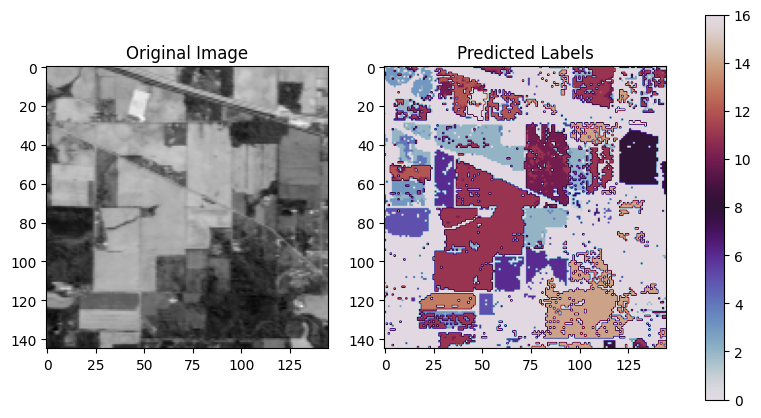

In [103]:
# # reshape y_pred to match the shape of the original image
# y_pred_2d = np.reshape(y_pred, (145,145))

# # display the predicted labels as a 2D image

# im = plt.imshow(y_pred_2d,cmap = 'twilight')
# cbar = plt.colorbar(im)
# plt.show()

# reshape y_pred to match the shape of the original image
y_pred_2d = np.reshape(y_pred, (145,145))

# # display the original image and the predicted labels side by side
# fig, axs = plt.subplots(1, 2, figsize=(10, 5),num=1)

plt.figure(1)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# rest of the code for creating subplots and displaying images


# display the original image
axs[0].imshow(old_data.reshape(145,145,30)[:,:,0], cmap='gray')
axs[0].set_title('Original Image')

# display the predicted labels as a 2D image
im = axs[1].imshow(y_pred_2d, cmap='twilight')
axs[1].set_title('Predicted Labels')
cbar = fig.colorbar(im, ax=axs.ravel().tolist())

plt.show()
